<a href="https://colab.research.google.com/github/BasheerAhmedk/Machine-Learning-Projects/blob/main/Simple_Linear_and_Multiple_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2023-07-06 00:23:48--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   117KB/s    in 0.6s    

2023-07-06 00:23:49 (117 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Understanding the Data
FuelConsumption.csv:
We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source

MODELYEAR e.g. 2014
MAKE e.g. Acura
MODEL e.g. ILX
VEHICLE CLASS e.g. SUV
ENGINE SIZE e.g. 4.7
CYLINDERS e.g 6
TRANSMISSION e.g. A6
FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0
Reading the data in

In [ ]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Data Exploration
Lets first have a descriptive exploration on our data.

In [ ]:
# summarize the data
df.describe()

#For categorical data use , df.describe(include='all')

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more.

In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


we can plot each of these fearues:

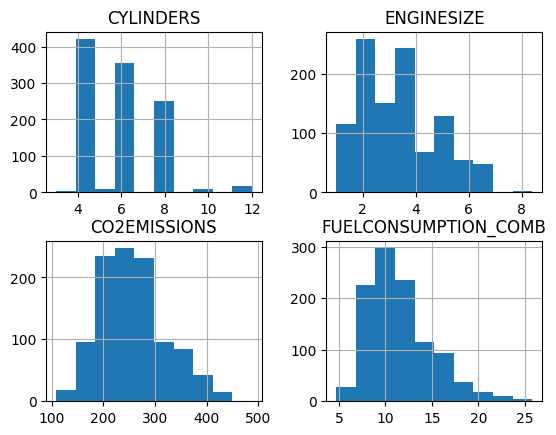

In [ ]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

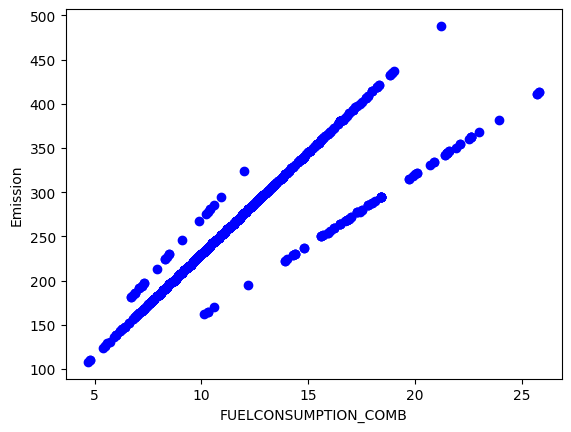

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

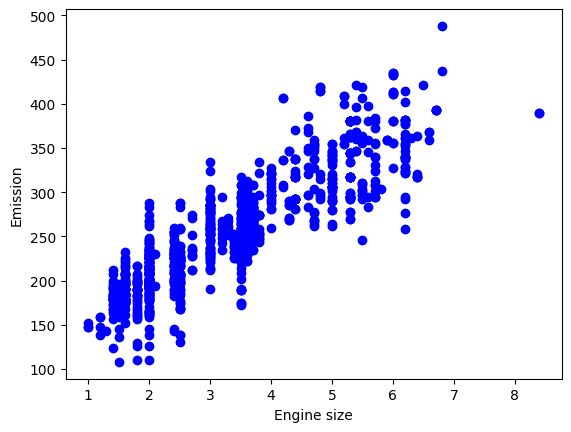

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Practice
plot CYLINDER vs the Emission, to see how linear is their relation:

Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

Train data distribution

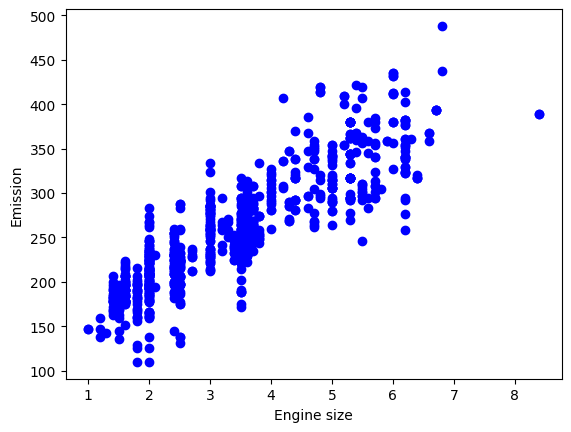

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Modeling
Using sklearn package to model data.

Simple Linear Regression

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[16.02276199]]
Intercept:  [71.04275009]


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error. - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones. - Root Mean Squared Error (RMSE). - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 19.04
Residual sum of squares (MSE): 691.00
R2-score: 0.75


Multiple Linear Regression

In [ ]:
from sklearn import linear_model
regr_m = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr_m.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr_m.coef_)
print ('Intercept: ',regr_m.intercept_)

Coefficients:  [[19.75832731  9.4691173 ]]
Intercept:  [80.53338679]


In [ ]:
test_x = np.asanyarray(test[['ENGINESIZE', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr_m.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 16.45
Residual sum of squares (MSE): 525.38
R2-score: 0.82


Task:

Design a simple linear regression model using all possible features and find the minimum MSE and R2 Score.
Develop a multiple linear regression (MLR) using more than one feature and obtain the minimum possible error.
Use MLR to estimate the Mileage per gallon (MPG) using Auto-MPG dataset. (https://www.kaggle.com/datasets/uciml/autompg-dataset)
Note: Remove car name from the original dataset

In [ ]:
import pandas as pd

# Load the Auto-MPG dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/auto-mpg.csv")

# Remove the "car name" column
df.drop("car name", axis=1, inplace=True)

# Display the first few rows of the dataset
print(df.head())


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df = df[df['horsepower']!='?']
df.horsepower = pd.to_numeric(df.horsepower)
df[['horsepower']] = df[['horsepower']].replace(np.nan, df.horsepower.median())

<ipython-input-13-09ed1bcf0ff8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower = pd.to_numeric(df.horsepower)
<ipython-input-13-09ed1bcf0ff8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['horsepower']] = df[['horsepower']].replace(np.nan, df.horsepower.median())


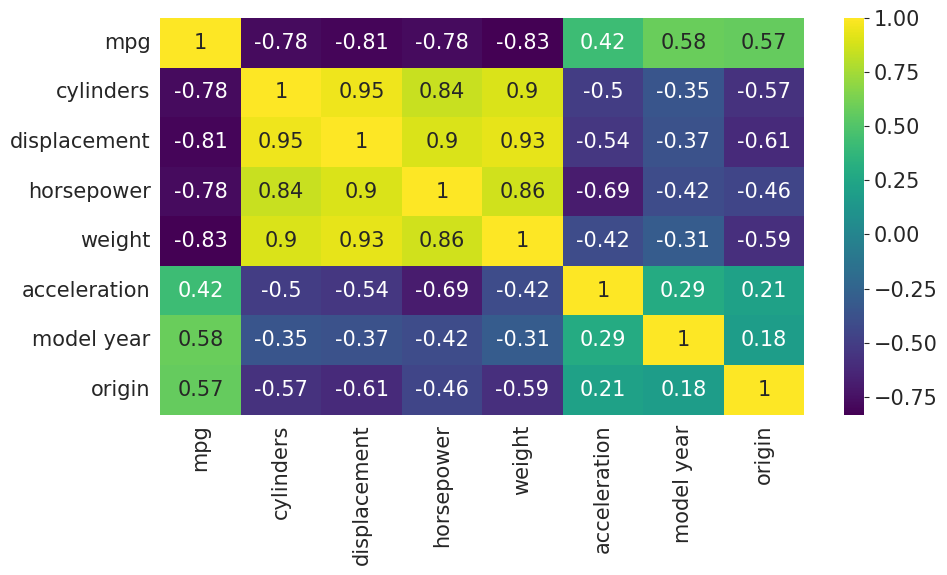

In [ ]:
plt.rc('font',size=15)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.tight_layout();

In [ ]:
df.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [ ]:
df["model year"].value_counts()


73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: model year, dtype: int64

In [ ]:
df.cylinders.value_counts()

0.2    199
1.0    103
0.6     83
0.0      4
0.4      3
Name: cylinders, dtype: int64

In [ ]:
scalar = MinMaxScaler()
df[['weight','displacement','horsepower',"model year","origin","cylinders"]] = scalar.fit_transform(df[['weight','displacement','horsepower',"model year","origin","cylinders"]])

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,1.0,0.617571,0.456522,0.536150,12.0,0.0,0.0
1,15.0,1.0,0.728682,0.646739,0.589736,11.5,0.0,0.0
2,18.0,1.0,0.645995,0.565217,0.516870,11.0,0.0,0.0
3,16.0,1.0,0.609819,0.565217,0.516019,12.0,0.0,0.0
4,17.0,1.0,0.604651,0.510870,0.520556,10.5,0.0,0.0


In [ ]:
df.origin.unique()

array([0. , 1. , 0.5])

In [ ]:
X = df.drop(['mpg'],axis=1)
y = df.mpg

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.2,random_state=3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
mean_squared_error(y_pred=y_pred,y_true=y_test)

13.04271547533017

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred=y_pred,y_true=y_test)

0.786067827141046

In [ ]:
rid = Ridge(alpha=.05)
rid.fit(X_train,y_train)
y_pred = rid.predict(X_test)
print(mean_squared_error(y_true=y_test, y_pred=y_pred))
r2_score(y_pred=y_pred,y_true=y_test)

13.00542548286987


0.7866794734755853

In [ ]:
from xgboost import XGBRegressor

In [ ]:

y = df.mpg
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train, test_size=0.10, random_state=42)

xgreg = XGBRegressor()
xgreg.fit(X_train1, y_train1)
y_pred_val = xgreg.predict(X_val)
print ('MSE on validation set(xgb): {}'.format(mean_squared_error(y_true=y_val, y_pred=y_pred_val)))
print ('R-Square on validation set(xgb): {}'.format(r2_score(y_pred=y_pred_val,y_true=y_val)))


xgreg.fit(X_train,y_train)
y_pred_test = xgreg.predict(X_test)
print ('MSE on test set(xgb): {}'.format(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
print ('R-Square on test set(xgb): {}'.format(r2_score(y_pred=y_pred_test,y_true=y_test)))

MSE on validation set(xgb): 11.53669983955269
R-Square on validation set(xgb): 0.7320082393105296
MSE on test set(xgb): 7.437049739887162
R-Square on test set(xgb): 0.8542914428517261


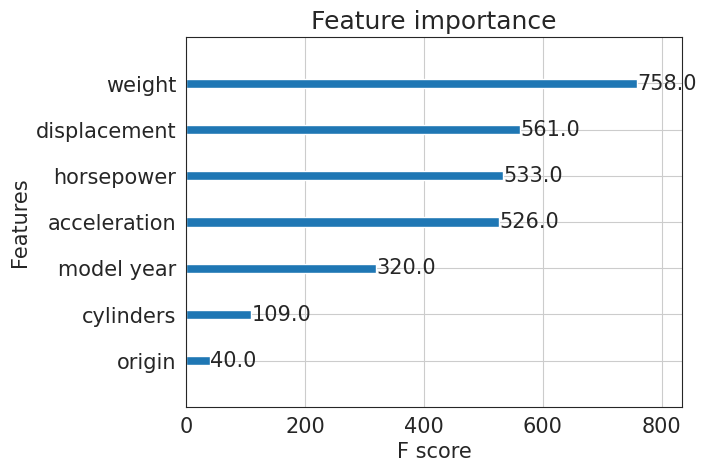

In [ ]:
from xgboost import plot_importance
plot_importance(xgreg);

In [ ]:
X = df[['displacement','horsepower','acceleration','model year','weight']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train, test_size=0.10, random_state=42)

xgb = XGBRegressor()
xgb.fit(X_train1, y_train1)
y_pred_val = xgb.predict(X_val)
print ('MSE on validation set(xgb): {}'.format(mean_squared_error(y_true=y_val, y_pred=y_pred_val)))
print ('R-Square on validation set(xgb): {}'.format(r2_score(y_pred=y_pred_val,y_true=y_val)))


xgb.fit(X_train,y_train)
y_pred_test = xgb.predict(X_test)
print ('MSE on test set(xgb): {}'.format(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
print ('R-Square on test set(xgb): {}'.format(r2_score(y_pred=y_pred_test,y_true=y_test)))


MSE on validation set(xgb): 11.076887055658313
R-Square on validation set(xgb): 0.7426894600458485
MSE on test set(xgb): 9.304770785905381
R-Square on test set(xgb): 0.8176985803203388
